https://drive.google.com/file/d/1C9NIF-PFPI_HhISulIBRTNXLkAS8_uR3/view?usp=sharing

In [ ]:
! gdown --id 1C9NIF-PFPI_HhISulIBRTNXLkAS8_uR3

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Error:

	'NoneType' object has no attribute 'groups'

To report issues, please visit https://github.com/wkentaro/gdown/issues.


# Чтение данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

Смотрим пропуски в таблице и понимаем, что в 'Cabin' 687 пропусков, в 'Age' 177 пропусков, а в 'Embarked' 2 пропуска

In [ ]:
df.info()

NameError: name 'df' is not defined

<Axes: >

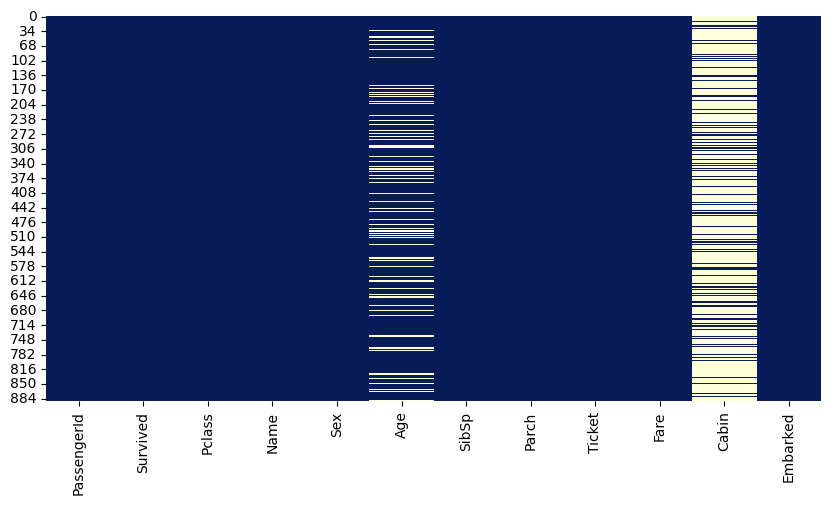

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [ ]:
# df = df.drop('Cabin', axis=1)

for col in df.columns:
    if df[col].isna().sum() >= len(df[col])//2:
        df.drop(columns = col, inplace = True)

In [ ]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Заменяем пустые значения в age на 28(это среднее значение возраста)

In [ ]:
df['Age'] = df['Age'].fillna(28)

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Заменяем пустые значения в Embarked на выдуманное значение A

In [ ]:
df['Embarked'] = df['Embarked'].fillna('A')

<Axes: >

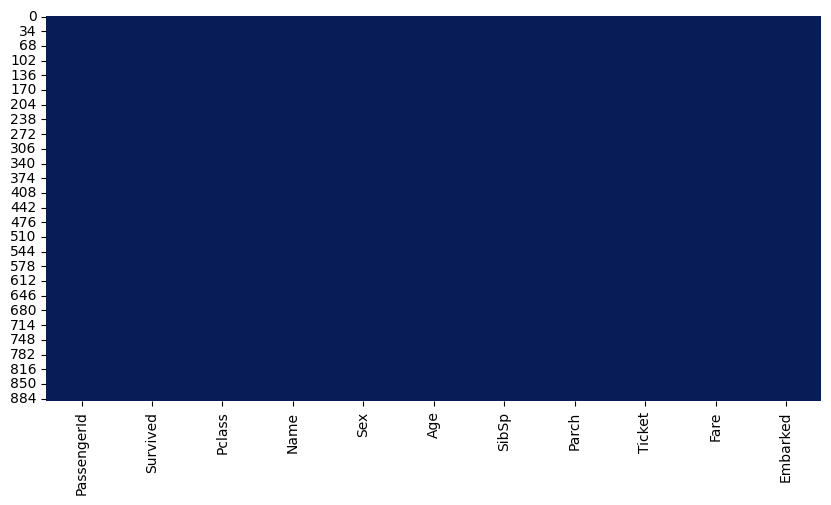

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

Как мы видем пустых и неправильных значений не осталось

Переводим значения таблицы в int

In [ ]:
from sklearn import preprocessing

def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, encoders = number_encode_features(df)
encoded_data.head()

<ipython-input-137-ad461657ed24>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object:
<ipython-input-137-ad461657ed24>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object:
<ipython-input-137-ad461657ed24>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in Num

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,3
1,2,1,1,190,0,38.0,1,0,596,71.2833,1
2,3,1,3,353,0,26.0,0,0,669,7.9250,3
3,4,1,1,272,0,35.0,1,0,49,53.1000,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,3


In [ ]:
encoders

{'Name': LabelEncoder(),
 'Sex': LabelEncoder(),
 'Ticket': LabelEncoder(),
 'Embarked': LabelEncoder()}

## Делаем Матрицу корреляций

По матрице корреляции можно заметить положительные зависемости между Parch и SibSp равную 0.41, между Pclass и Ticket равную 0.32, между Fare и Survived равную 0.26

<ipython-input-137-ad461657ed24>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object:
<ipython-input-137-ad461657ed24>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object:
<ipython-input-137-ad461657ed24>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in Num

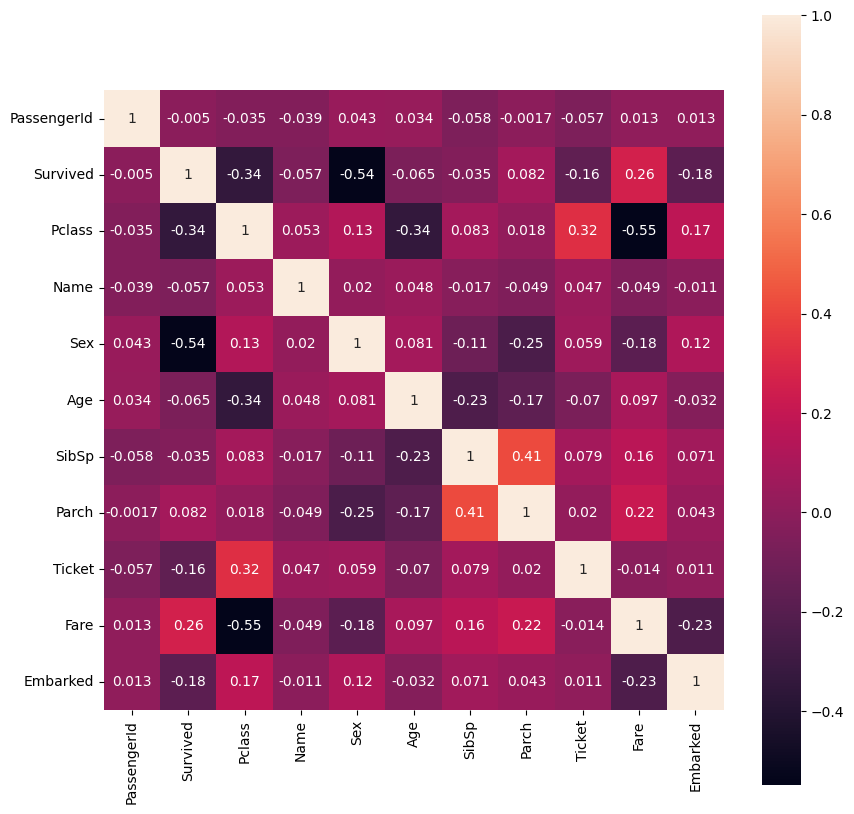

In [ ]:
plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True)
plt.show()